# Alpha & Beta

*Basically, its all about correlation*.

<br/>

## Linear Regression
- Used to create a predictive model when there is **linear correlation** between input and output
    - ie: Years of Experience vs. Salary
- The model is "fitted" using Maximum Likelihood Estimation / Calculus

<br/>

- A line = `y = mx + b`
    - x = input variable
    - y = output variable
    - m = slope of the line
    - b = y-intercept (where the line crosses the y-axis)
        - `b = y` when `x = 0`

<br/>

### Linear Regression in Finance

- x-axis: 'the market', usually S&P500
- y-axis: another stock/index/mutual fund/etc...
    - example will use AAPL for y
- If you create a scatter plot for the market (x) and AAPL (y) and add the line of best fit (linear regression model)
    - Alpha (α) is the y-intercept.
    - Beta (β) is the slope of the line.
- If β=2 then if SPY (SP500) increases by 1%, AAPL will increase by 2%
    - If SPY decreases by 5%, AAPL decreases by 10%.

- α > 0: AAPL has outperformed the market.
    - α < 0: AAPL has underperformed the market.

<br/>

### Linear Regression in Code - via Scikit Lean

```py
# Create model instance
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y) # X=SPY, Y=AAPL

# Use the model to make a linear regression prediction
Yhat = model.predict(X)
```

<br/>

## Summary

- Alpha and Beta - Just the parameters of the line of best fit.
- Alpha: how much better/worse an asset performs compared to a market.
- Beta: how much the asset moves *with* the market.
- NOTE: this doesn't say anything about the accuracy/noise of the data compared to the model/results of predeiction.

In [1]:
# Alpha and Beta in Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spy = pd.read_csv('../SPY.csv', index_col=0, parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [3]:
# Get the returns (pct_change) for SPY

spy['SPY'] = spy['Close'].pct_change(1)

In [4]:
index = pd.read_csv('../sp500sub.csv', index_col=0, parse_dates=True)

In [5]:
# Extract the AAPL stocks

aapl = index[index['Name'] == 'AAPL'].copy()

In [6]:
# Get the percent change (Return)

aapl['AAPL'] = aapl['Close'].pct_change(1)

In [7]:
# Join the AAPL and SPY returns data

joined = aapl[['AAPL']].join(spy['SPY'])

In [8]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


<AxesSubplot:xlabel='Date'>

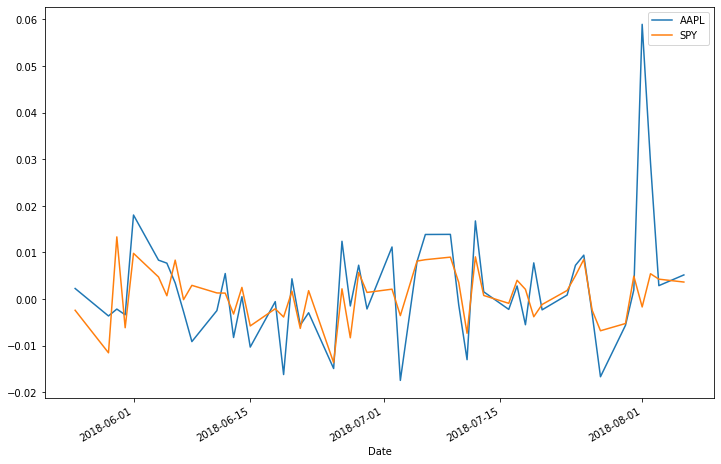

In [34]:
# Plotting the joined data - subset of data due to noise

joined.iloc[-150:-100].plot(figsize=(12, 8))

Text(0.5, 1.0, 'SPY vs AAPL')

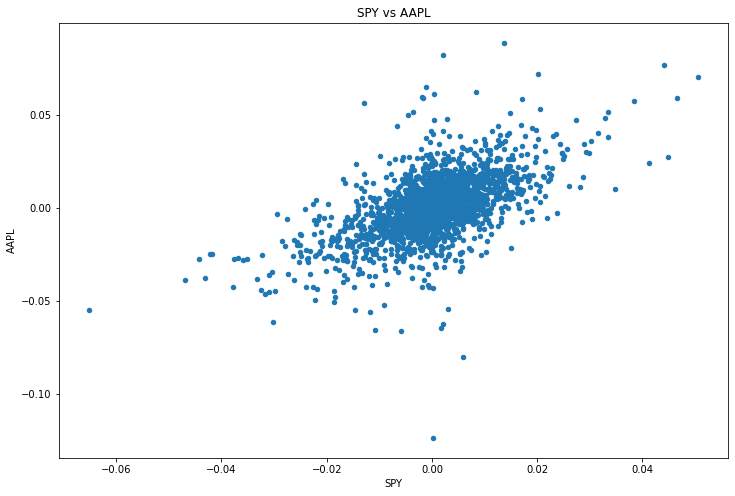

In [13]:
# Creating a scatter plot of AAPL vs. SPY - give idea of correlation

joined.plot.scatter('SPY', 'AAPL', figsize=(12,8))
plt.title("SPY vs AAPL")

In [14]:
# Make the dataset for machine learning

joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [15]:
# Check shape of X and Y to ensure they are N by 1 (2D) arrays.

X.shape, Y.shape

((2262, 1), (2262, 1))

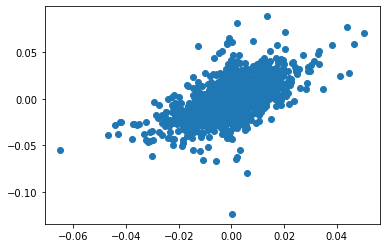

In [16]:
# Plot should be the same as above.

plt.scatter(X, Y)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [20]:
# Prepare to draw the scatterplot WITH the line of best fit

# Create an input array of equally spaced points (5) (between min & max to span entire dataset). Reshape to N by 1 to fit the sklearn model.

X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1,1)
Y_predict = model.predict(X_predict)

Text(0.5, 1.0, 'SPY vs AAPL\nLine of best fit')

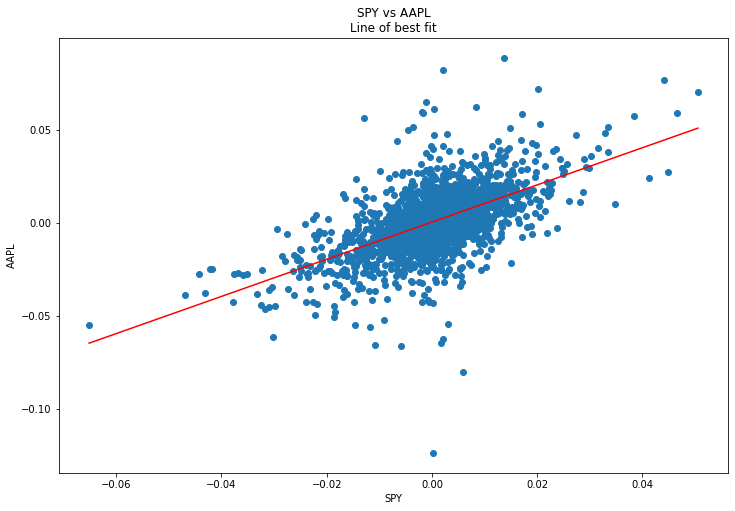

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(X, Y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(X_predict, Y_predict, color='r')
plt.title("SPY vs AAPL\nLine of best fit")

In [28]:
# Retrieve Alpha and Beta from the predicted model 
# slope = coef_  |  y_intercept = intercept_  per docs

beta = model.coef_
alpha = model.intercept_

alpha, beta

(array([0.00046298]), array([[0.99836387]]))

Text(0.5, 1.0, 'SPY vs AAPL\nLine of best fit - Manually calculated')

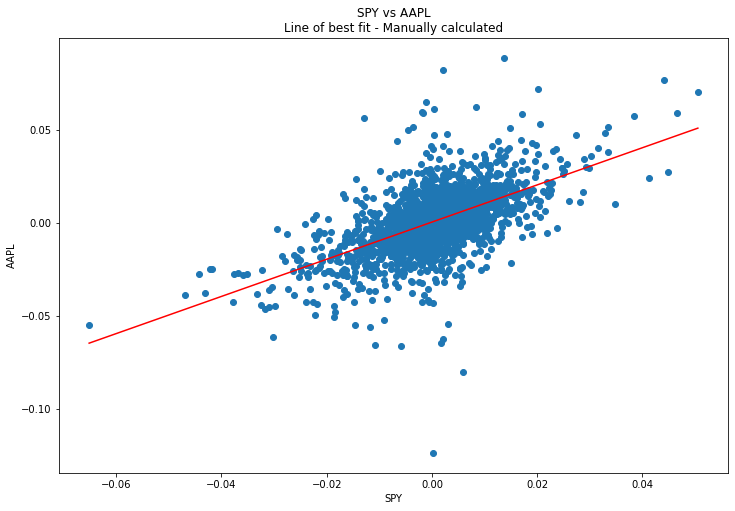

In [30]:
# Drawing the plot manually - ie: (Beta * Market_return + Alpha)

Y_predict = beta * X_predict + alpha

plt.figure(figsize=(12,8))
plt.scatter(X, Y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(X_predict, Y_predict, color='r')
plt.title("SPY vs AAPL\nLine of best fit - Manually calculated")

In [31]:
# Finding the risk vs. volatility between SPY and AAPL to see if it is worth investing in AAPL over SPY (via std)

joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [32]:
joined['AAPL'].std() / joined['SPY'].std()  # volatility of AAPL - Higher risk, higher reward than market.

1.7179632360403783